In [1]:
import clarinet

modulation = clarinet.PSK(2, baud=200)


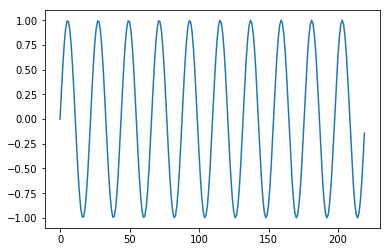

In [2]:
import matplotlib.pyplot as plt
zero = modulation.generateSymbol(0)
plt.plot(zero)
plt.show()

In [3]:
import numpy as np
#modulation._phaseToVal(np.pi)
modulation.parseSymbol(zero)

0

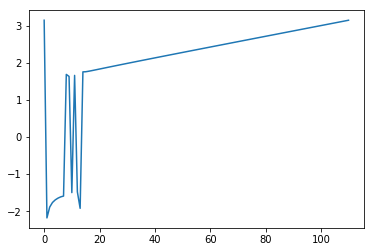

In [4]:
import numpy as np
import scipy

window = scipy.signal.hamming(modulation.symbol_width)
fft = np.fft.rfft(zero*window)
mag = abs(fft)
phase = np.angle(fft)

plt.plot(phase)
plt.show()


In [5]:
from numpy.fft import fft, ifft

def periodic_corr(x, y):
    """Periodic correlation, implemented using the FFT.

    x and y must be real sequences with the same length.
    """
    return ifft(fft(x) * fft(y).conj()).real

zero = modulation.generateSymbol(0)
one = modulation.generateSymbol(1)
two = modulation.generateSymbol(2)
three = modulation.generateSymbol(3)
correlation_0 = scipy.signal.correlate(zero, zero)
correlation_1 = scipy.signal.correlate(zero, one)
correlation_2 = scipy.signal.correlate(zero, two)
correlation_3 = scipy.signal.correlate(zero, three)
print(np.argmax(correlation_0))
print(np.argmax(correlation_1))
print("Length of symbol: %d" % modulation.symbol_width)
print("%d" % (modulation._carrier_freq // modulation.baud))
samples_per_oscillation = modulation.sample_rate / modulation._carrier_freq
print("Samples per oscillation: %f" % samples_per_oscillation)

print(np.argmax(correlation_0) % samples_per_oscillation)
print(np.argmax(correlation_1) % samples_per_oscillation)
print(np.argmax(correlation_2) % samples_per_oscillation)
print(np.argmax(correlation_3) % samples_per_oscillation)
plt.plot(correlation_0)
plt.show()
plt.plot(correlation_1)
plt.show()


219
224
Length of symbol: 220
10
Samples per oscillation: 22.050000
20.55
3.5
9.55
15.55
